In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('crypto_data_cleaned.csv' ,index_col=0)

In [5]:
data.shape

(1106, 13)

In [ ]:
data.head()

,_ADAUSDT_,_BTCUSDT_,_TRXUSDT_,_EOSUSDT_,_NEOUSDT_,_XLMUSDT_,_LINKUSDT_,_ZECUSDT_,_XRPUSDT_,_ETHUSDT_,_BNBUSDT_,_LTCUSDT_,_ETCUSDT_
Date,,,,,,,,,,,,,
30/03/2022,1.175,47102.00,0.06855,2.843,26.37,0.2302,16.73,191.0,0.8490,3360.22,430.2,128.4,49.18
29/03/2022,1.191,47434.80,0.06936,2.894,26.84,0.2331,16.98,196.3,0.8577,3400.51,434.2,130.1,49.28
28/03/2022,1.170,47122.21,0.06910,2.860,25.33,0.2298,16.50,192.2,0.8641,3332.92,430.2,127.6,47.07
27/03/2022,1.184,46827.76,0.06899,2.670,26.05,0.2297,16.87,210.3,0.8580,3295.65,430.5,129.7,48.00
26/03/2022,1.152,44511.27,0.06632,2.513,24.73,0.2157,15.83,204.8,0.8327,3145.00,415.8,124.8,47.18


In [ ]:
print('Null Values =',data.isnull().values.any())
data.shape

Null Values = False


(1106, 13)

In [ ]:
datareturns = data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head()

,_ADAUSDT_,_BTCUSDT_,_TRXUSDT_,_EOSUSDT_,_NEOUSDT_,_XLMUSDT_,_LINKUSDT_,_ZECUSDT_,_XRPUSDT_,_ETHUSDT_,_BNBUSDT_,_LTCUSDT_,_ETCUSDT_
Date,,,,,,,,,,,,,
30/03/2022,0.727370,1.172967,0.743158,-0.646133,0.110597,0.303937,0.315590,1.737940,0.958818,1.476540,1.272722,0.291457,1.333673
29/03/2022,0.748485,1.190471,0.767793,-0.611935,0.134281,0.324058,0.337501,1.833021,0.983524,1.505479,1.292360,0.317662,1.338256
28/03/2022,0.720772,1.174030,0.759885,-0.634733,0.058192,0.301161,0.295433,1.759468,1.001699,1.456931,1.272722,0.279125,1.236968
27/03/2022,0.739247,1.158542,0.756540,-0.762137,0.094473,0.300468,0.327860,2.084176,0.984376,1.430161,1.274195,0.311496,1.279591
26/03/2022,0.697018,1.036700,0.675336,-0.867413,0.027958,0.203329,0.236713,1.985508,0.912528,1.321952,1.202027,0.235964,1.242009


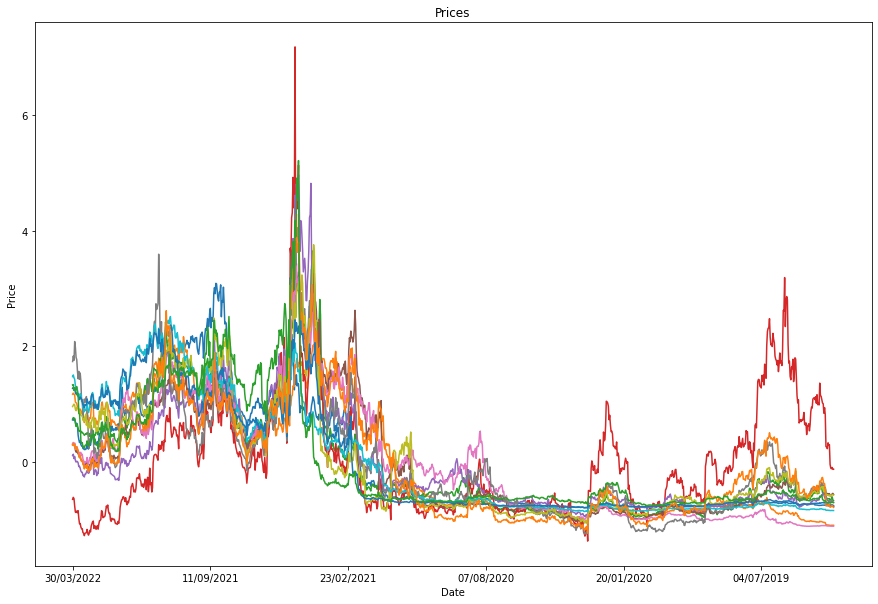

In [ ]:
rescaledDataset.plot(figsize=(15,10),legend=False)
plt.ylabel("Price")
plt.title("Prices");

normalizing the data between 0 to 1 to ensure stable results  

In [6]:
import numpy as np

from sklearn import preprocessing

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()

scaled_x = min_max_scaler.fit_transform(data)

scaled_x

array([[0.39137734, 0.67881863, 0.3860077 , ..., 0.63120043, 0.27535827,
        0.35055792],
       [0.3968145 , 0.68405218, 0.39120668, ..., 0.63719839, 0.28010727,
        0.35132482],
       [0.38967822, 0.67913645, 0.38953787, ..., 0.63120043, 0.27312345,
        0.33437632],
       ...,
       [0.01366088, 0.00109908, 0.10186136, ..., 0.00882165, 0.08676705,
        0.01077495],
       [0.01172389, 0.00079903, 0.09050064, ..., 0.00883739, 0.08221359,
        0.01060547],
       [0.00987525, 0.00070011, 0.08831836, ..., 0.00763915, 0.08020225,
        0.00989532]])

In [11]:


dfscaled = pd.DataFrame(scaled_x)


Ensuring if the data is if the data is normalised 

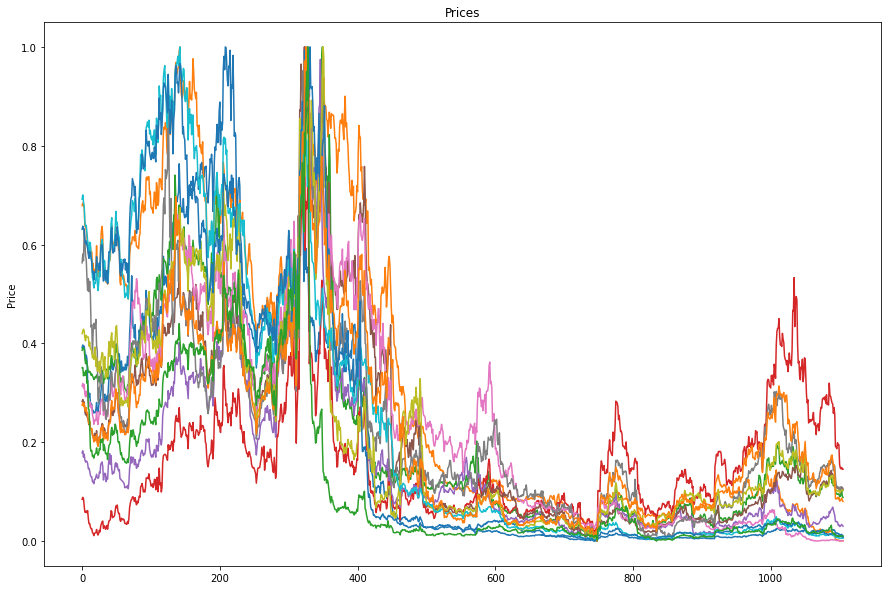

In [12]:
dfscaled.plot(figsize=(15,10),legend=False)
plt.ylabel("Price")
plt.title("Prices");

HRP works in 3 stages 

Stage 1: Tree Clustering

Stage 2: Quasi-Diagonalization

Stage 3: Recursive-Bisection


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

Tree Data 

•	Group similar investments into clusters. 

•	Greater correlation means a Shorter distance 

•	Hierarchical structure: 

○	more stable 

○	more feasible 

○	more intuitive 


In [ ]:
corr = rescaledDataset.corr()
cov = rescaledDataset.cov()

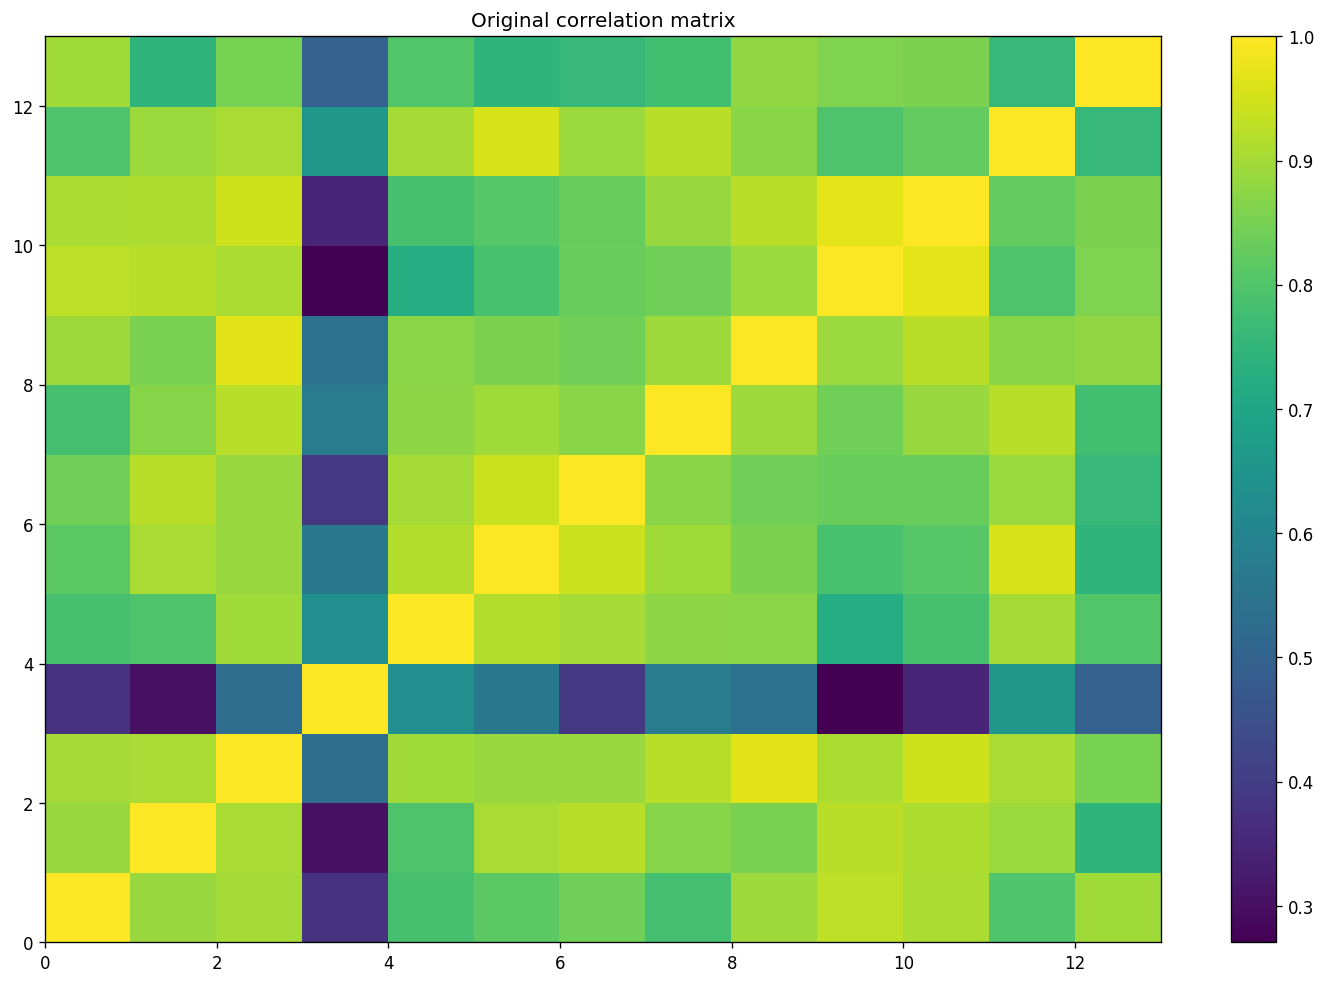

In [ ]:
plt.figure(figsize=(15,10),dpi=120)
plt.pcolormesh(corr)
plt.colorbar()
plt.title('Original correlation matrix')
plt.show()

Distance 

In [ ]:
# Distance Measure of original correlation matrix
d = np.sqrt((1 - corr) / 2)

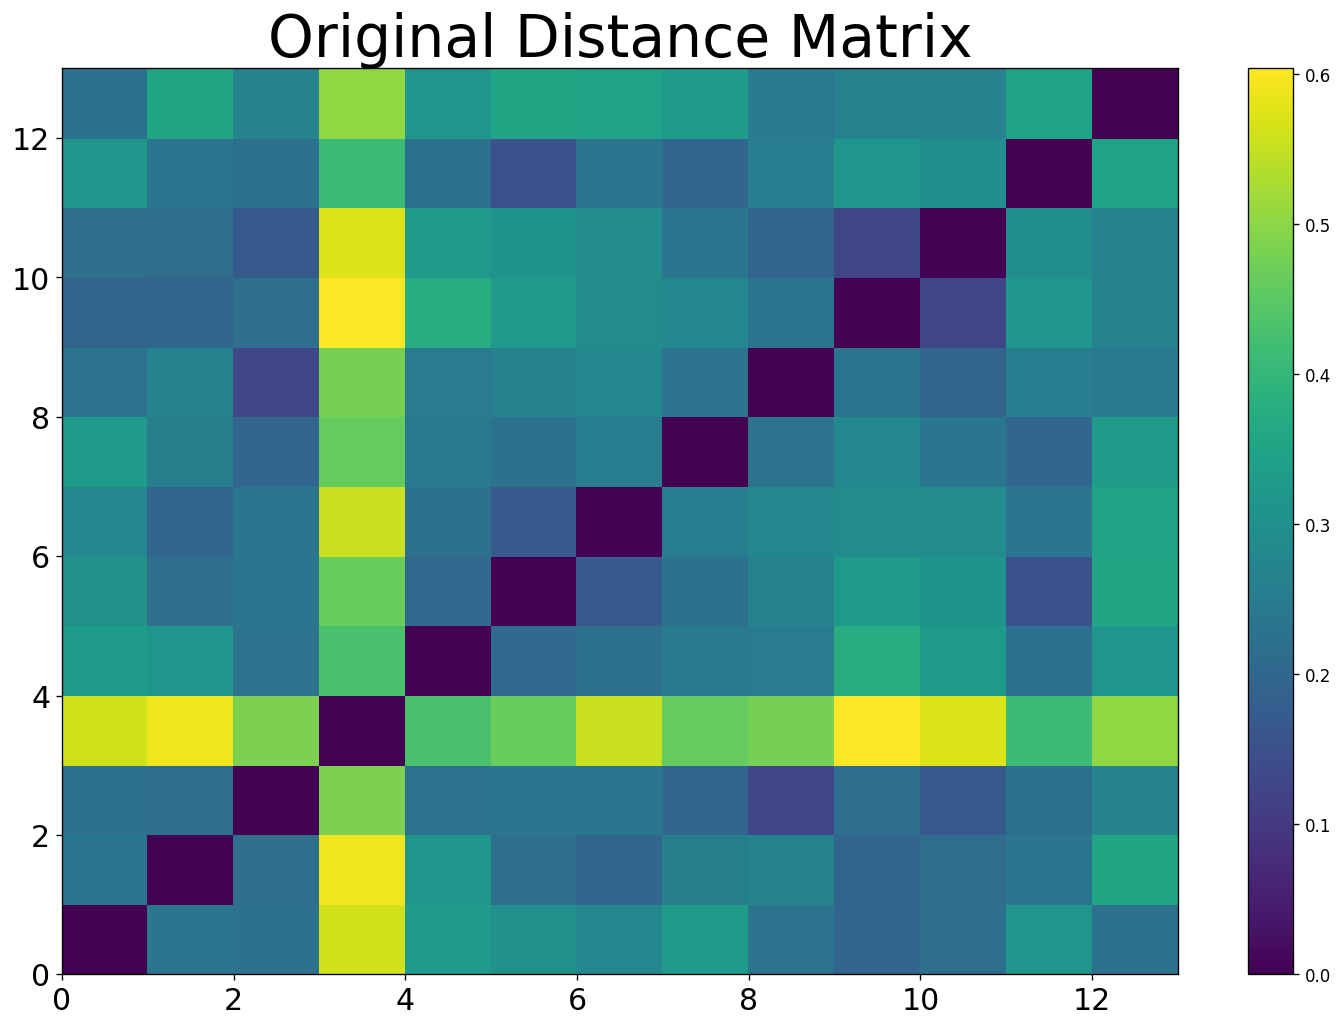

In [ ]:
plt.figure(figsize=(15,10),dpi=120)
plt.pcolormesh(d)
plt.colorbar()
plt.title('Original Distance Matrix', fontsize=35)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
def tree_clustering(dist_mat, method="single", metric =  'eculidean'):
    flat_dist_mat = squareform(dist_mat) 
    res_linkage = linkage(flat_dist_mat, method=method, metric = metric)
    return res_linkage

res_linkage = tree_clustering(d)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text major ticklabel objects>)

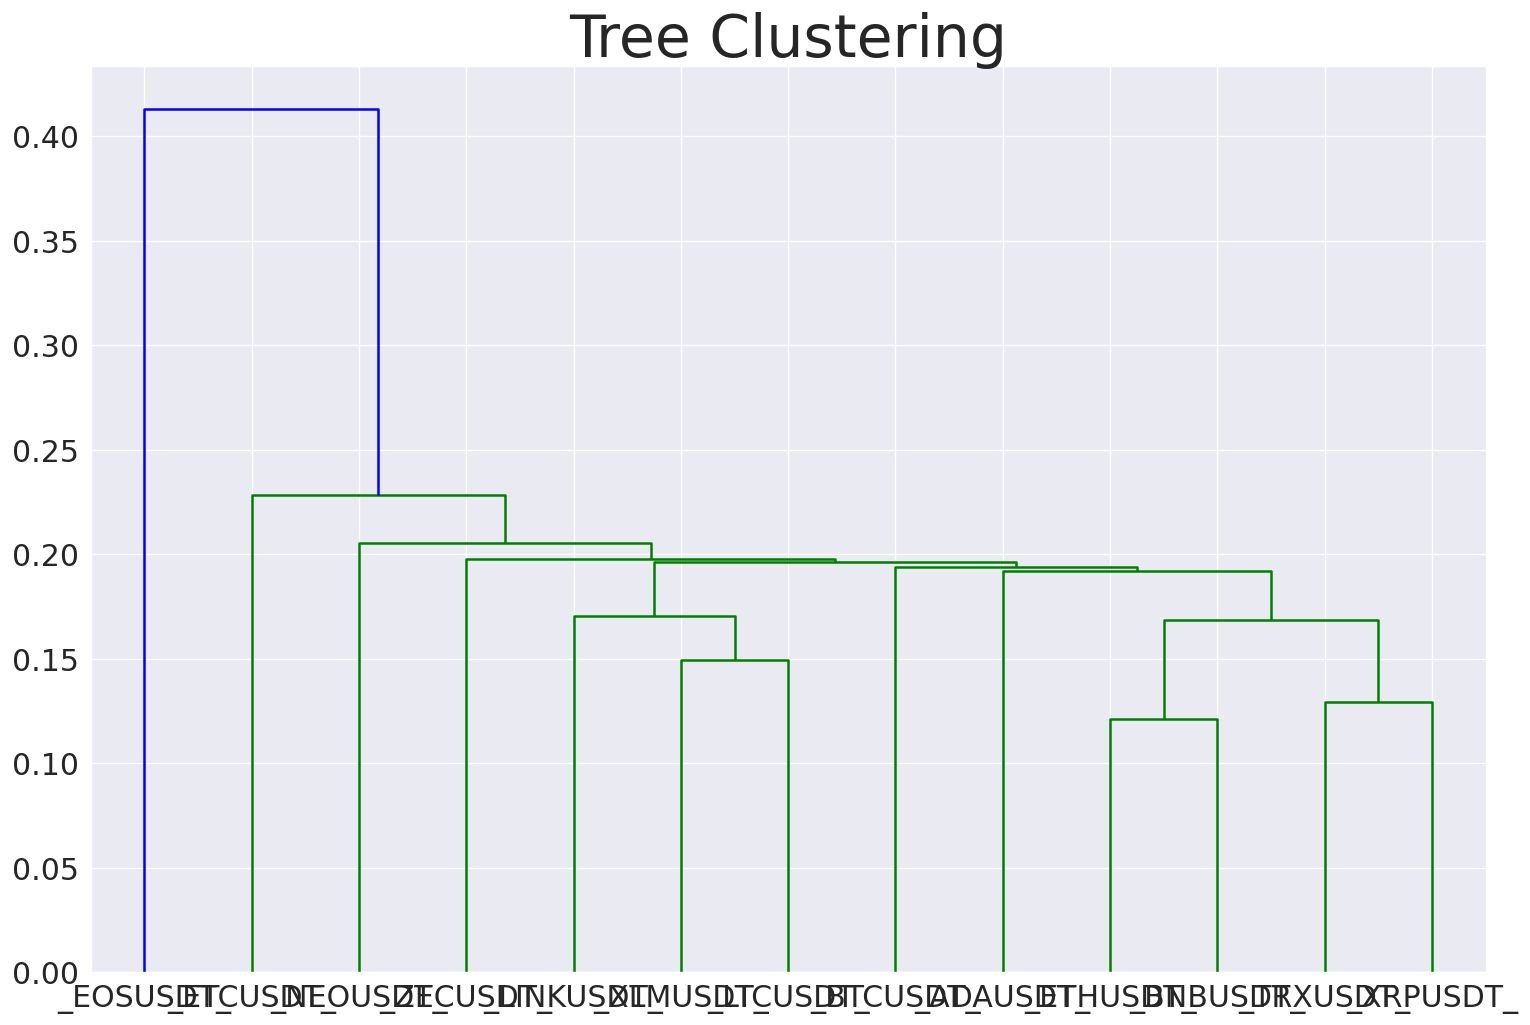

In [ ]:
import seaborn as sns
# sns.set_context("talk")
sns.set_style("darkgrid")
plt.figure(figsize=(15,10),dpi=120)
dn = dendrogram(res_linkage, labels=corr.index.values) 
plt.title('Tree Clustering', fontsize=35)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Stage 2: Quasi-Diagonalization


●	Reorganize the covariance matrix so similar investments will be placed together. 

●	This matrix diagonalization allow us to distribute weights optimally following an inverse-variance allocation. 


The ordered distance matrix has brought the crypos with similar weights together 

In [ ]:
def seriation(Z, N, cur_index):
    """Returns the order implied by a hierarchical tree (dendrogram).
    
       :param Z: A hierarchical tree (dendrogram).
       :param N: The number of points given to the clustering process.
       :param cur_index: The position in the tree for the recursive traversal.
       
       :return: The order implied by the hierarchical tree Z.
    """
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index - N, 0])
        right = int(Z[cur_index - N, 1])
        return (seriation(Z, N, left) + seriation(Z, N, right))

def compute_serial_matrix(dist_mat, method="single"):
    """Returns a sorted distance matrix.
    
       :param dist_mat: A distance matrix.
       :param method: A string in ["ward", "single", "average", "complete"].
        
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    """
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    
    res_linkage = linkage(flat_dist_mat, method=method)
    res_order = seriation(res_linkage, N, N + N - 2)
    
    seriated_dist = np.zeros((N, N)) #ordered
    a,b = np.triu_indices(N, k=1)
    
    seriated_dist[a,b] = dist_mat[[res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b] #0
    
    return seriated_dist, res_order, res_linkage    

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(d.values)

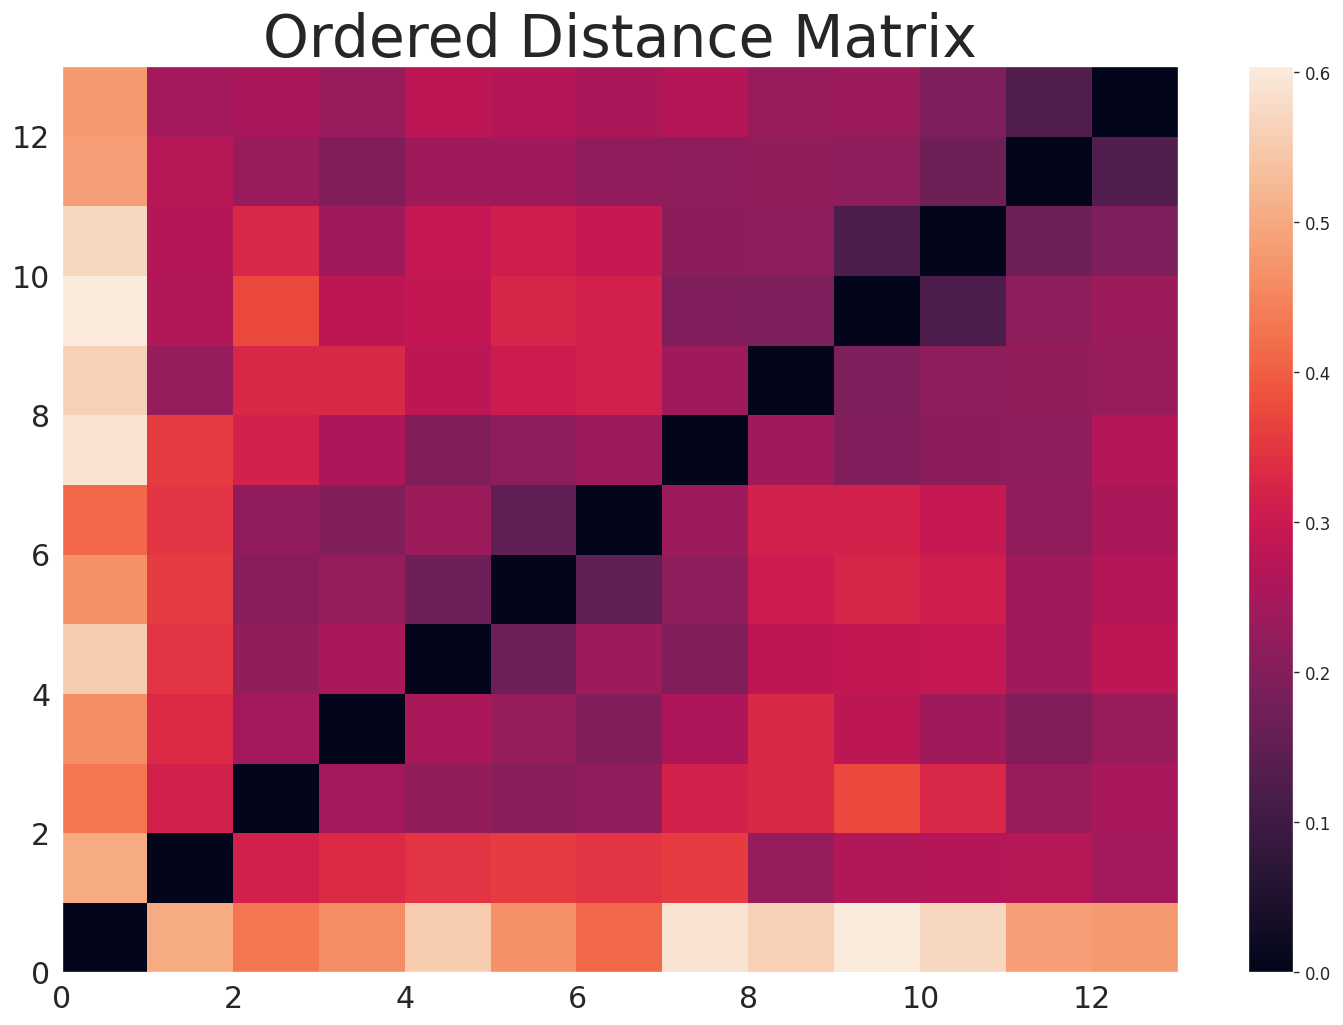

In [ ]:
plt.figure(figsize=(15,10),dpi=120)
plt.pcolormesh(ordered_dist_mat)
plt.colorbar()
plt.title('Ordered Distance Matrix', fontsize=35)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Stage 3: Recursive-Bisection

●	Distribute the allocation through recursive bisection based on cluster covariance. 

●	The bisection method is a root-finding method that applies to any continuous functions for which one knows two values with opposite signs.  


In [ ]:
def compute_HRP_weights(covariances, res_order):
    weights = pd.Series(1, index=res_order)
    clustered_lists = [res_order] 
    while len(clustered_lists) > 0:
            # Bisect：clustered_lists list
            clustered_lists = [cluster[start:end] for cluster in clustered_lists
                                for start, end in ((0, len(cluster) // 2),
                                                   (len(cluster) // 2, len(cluster)))
                                if len(cluster) > 1]
            
            for subcluster in range(0, len(clustered_lists), 2):
                    left_cluster = clustered_lists[subcluster] # divide into groups every two lists; take the left cluster (list)
                    right_cluster = clustered_lists[subcluster + 1] # take the right cluster (list)

                    left_subcovar = covariances.iloc[left_cluster, left_cluster] # the covariance matrix of the indexes in left clusters
                    inv_diag = 1 / np.diag(left_subcovar.values) 
                    parity_w = inv_diag * (1 / np.sum(inv_diag)) 
                    left_cluster_var = np.dot(parity_w, np.dot(left_subcovar, parity_w)) 

                    right_subcovar = covariances.iloc[right_cluster, right_cluster] # the covariance matrix of the indexes in right clusters
                    inv_diag = 1 / np.diag(right_subcovar.values)
                    parity_w = inv_diag * (1 / np.sum(inv_diag))
                    right_cluster_var = np.dot(parity_w, np.dot(right_subcovar, parity_w))

                    alloc_factor = 1 - left_cluster_var / (left_cluster_var + right_cluster_var)

                    weights[left_cluster] *= alloc_factor #weightsof left_cluster index
                    weights[right_cluster] *= 1 - alloc_factor
    return weights               
compute_HRP_weights(cov, res_order)

3     0.140259
12    0.077827
4     0.077827
7     0.118628
6     0.061086
5     0.061086
11    0.115144
1     0.061010
0     0.061010
9     0.056473
10    0.056473
2     0.056588
8     0.056588
dtype: float64